# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='right')
# Display the data table for preview
study_data_df=pd.DataFrame(study_data)
study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
number_of_mice = len(pd.unique(study_data_df['Mouse ID']))
print(number_of_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice = study_data[study_data[['Mouse ID','Timepoint']].duplicated()]
duplicate_mice = study_data_df[study_data_df.duplicated(['Mouse ID', 'Timepoint'])]
#duplicateRows = df[df.duplicated(['col1', 'col2'])]
print(duplicate_mice)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
137      g989     Propriva  Female          21          26          0   
360      g989     Propriva  Female          21          26          5   
681      g989     Propriva  Female          21          26         10   
869      g989     Propriva  Female          21          26         15   
1111     g989     Propriva  Female          21          26         20   

      Tumor Volume (mm3)  Metastatic Sites  
137            45.000000                 0  
360            47.570392                 0  
681            49.880528                 0  
869            53.442020                 0  
1111           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data_df.drop(study_data_df[study_data_df['Mouse ID'] == 'g989'].index, inplace = False)
print(clean_study_data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        b128    Capomulin  Female           9          22          0   
1        f932     Ketapril    Male          15          29          0   
2        g107     Ketapril  Female           2          29          0   
3        a457     Ketapril  Female          11          30          0   
4        c819     Ketapril    Male          21          25          0   
...       ...          ...     ...         ...         ...        ...   
1888     r944    Capomulin    Male          12          25         45   
1889     u364    Capomulin    Male          18          17         45   
1890     p438     Ceftamin  Female          11          26         45   
1891     x773      Placebo  Female          21          30         45   
1892     b879     Stelasyn  Female           4          26         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              45.000000         

In [5]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = len(pd.unique(clean_study_data['Mouse ID']))
print(clean_number_of_mice)

248


In [6]:
clean_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen_df = clean_study_data.groupby(clean_study_data['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_mean = drug_regimen_df['Tumor Volume (mm3)'].mean()
#print(tumor_volume_mean)
tumor_volume_median = drug_regimen_df['Tumor Volume (mm3)'].median()

tumor_volume_variance = drug_regimen_df['Tumor Volume (mm3)'].var()

tumor_volume_std = drug_regimen_df['Tumor Volume (mm3)'].agg(np.std)

tumor_volume_sem = drug_regimen_df['Tumor Volume (mm3)'].agg(st.sem)


# Assemble the resulting series into a single summary DataFrame.

drug_tumor_summary_df = pd.DataFrame({'Mean Tumor Volume': tumor_volume_mean, 'Median Tumor Volume': tumor_volume_median, 
                                      'Tumor Volume Variance': tumor_volume_variance, 'Tumor Volume Std. Dev.': tumor_volume_std, 
                                      'Tumor Volume Std. Err.': tumor_volume_sem})

drug_tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_tumor_summary2_df = clean_study_data.groupby(clean_study_data['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
drug_tumor_summary2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

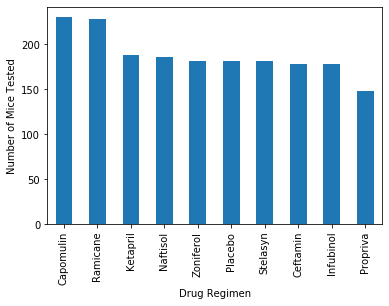

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


<AxesSubplot:title={'center':'Total Timepoints of Mice Tested by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

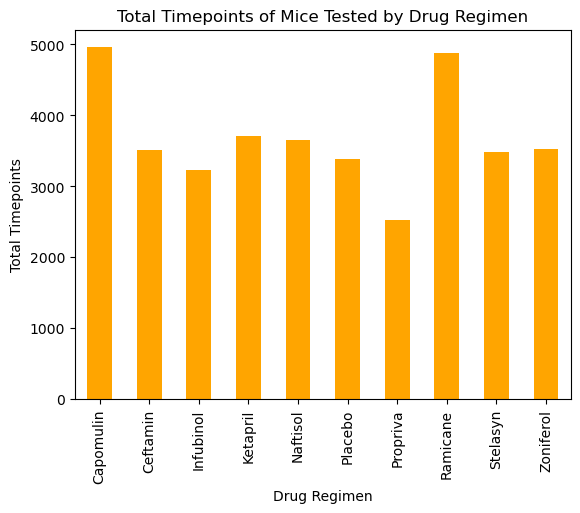

In [9]:
# dataframe to hold total timepoints for mice tested by drug type
timepoints_by_drug = drug_regimen_df['Timepoint'].sum()
timepoints_by_drug
#x axis is each different drug regimen 
# y axis is the sum/total# of timepoints per unique drug
#use pandas plot bar and assign axis labels, title, and color
timepoints_by_drug.plot.bar(x='Drug Regimen', ylabel='Total Timepoints', color='orange', title=('Total Timepoints of Mice Tested by Drug Regimen'))

([<matplotlib.axis.XTick at 0x1dde4582850>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ketapril'),
  Text(2, 0, 'Naftisol'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Stelasyn'),
  Text(5, 0, 'Ramicane'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Zoniferol'),
  Text(8, 0, 'Placebo'),
  Text(9, 0, 'Ceftamin')])

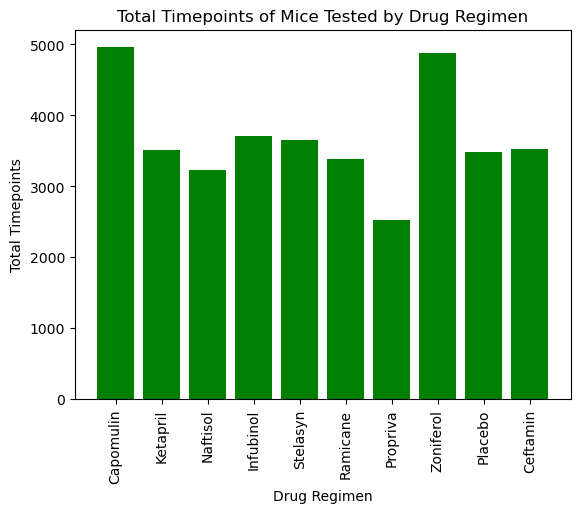

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#creating variable for xticks
unique_regimen = pd.unique(study_data_df['Drug Regimen'])
#setting variables for axes 
pybar_xaxis = np.arange(len(drug_regimen_df))
pybar_yaxis = drug_regimen_df['Timepoint'].sum()
# use pyplot to create bar plot 
plt.bar(pybar_xaxis, pybar_yaxis, color='green')
# bar plot details
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.title('Total Timepoints of Mice Tested by Drug Regimen')
plt.xticks(pybar_xaxis, unique_regimen, rotation='vertical')

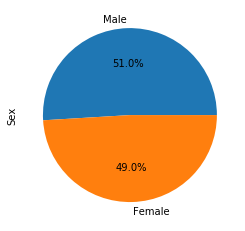

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



922
958


<AxesSubplot:ylabel='Number of Mice'>

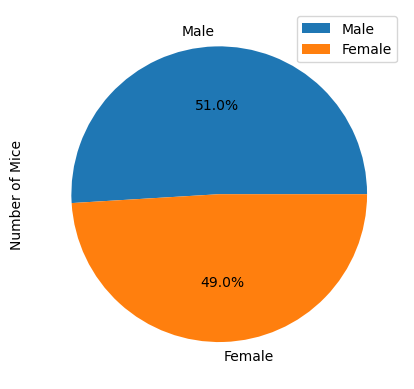

In [10]:
# get count of male and female mice
male_mice = clean_study_data.loc[(clean_study_data['Sex'] == 'Male')]
female_mice = clean_study_data.loc[(clean_study_data['Sex'] == 'Female')]
female_mice_count = len(female_mice['Sex'])
male_mice_count = len(male_mice['Sex'])
print(female_mice_count)
print(male_mice_count)

# create df for male mice and female mice using count of each 
female_vs_male_df = pd.DataFrame({'Number of Mice': [958, 922]}, index=['Male', 'Female'])
# create Pandas pie plot, showing percentages
female_vs_male_df.plot.pie(y='Number of Mice', autopct='%1.1f%%')

922
958


Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

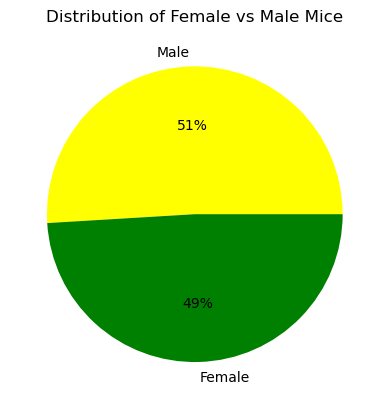

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# get count of male and female mice
male_mice = clean_study_data.loc[(clean_study_data['Sex'] == 'Male')]
female_mice = clean_study_data.loc[(clean_study_data['Sex'] == 'Female')]
female_mice_count = len(female_mice['Sex'])
male_mice_count = len(male_mice['Sex'])
print(female_mice_count)
print(male_mice_count)

pypie_labels = ['Male', 'Female']
pypie_sizes = [958, 922]
pypie_colors = ['yellow', 'green']

plt.pie(pypie_sizes, labels=pypie_labels, colors=pypie_colors, autopct='%1.0f%%')
plt.title('Distribution of Female vs Male Mice')


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# sort cleaned data by mouse id and timepoint to get data in order of least 
# to greatest timepoint by mouse ID
sorted_greatest_timepoint = clean_study_data.sort_values(by=['Mouse ID', 'Timepoint'])
print(sorted_greatest_timepoint)
# create df with only greatest timepoints for each mouse
# drop duplicates to get tumor volume at the greatest timepoint
greatest_timepoint_df = sorted_greatest_timepoint.drop_duplicates(subset=('Drug Regimen'), keep='last')
print(greatest_timepoint_df)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
113      a203    Infubinol  Female          20          23          0   
389      a203    Infubinol  Female          20          23          5   
598      a203    Infubinol  Female          20          23         10   
758      a203    Infubinol  Female          20          23         15   
1018     a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1143     z969     Naftisol    Male           9          30         25   
1407     z969     Naftisol    Male           9          30         30   
1529     z969     Naftisol    Male           9          30         35   
1730     z969     Naftisol    Male           9          30         40   
1869     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
113            45.000000                 0  
389            48.508468         

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftami']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#tumor_volume = greatest_timepoint_df['Tumor Volume (mm3)']
quartiles = greatest_timepoint_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')


#tumor_volume_data = greatest_timepoint_df.loc[(greatest_timepoint_df['Tumor Volume (mm3)'] < lower_bound) | (greatest_timepoint_df['Tumor Volume (mm3)'] > upper_bound)]
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_volume_data = [treatment, greatest_timepoint_df.loc[(greatest_timepoint_df['Tumor Volume (mm3)'] < lower_bound) | (greatest_timepoint_df['Tumor Volume (mm3)'] > upper_bound)]]
    #treatment = greatest_timepoint_df.loc[(greatest_timepoint_df['Tumor Volume (mm3)'] < lower_bound) | (greatest_timepoint_df['Tumor Volume (mm3)'] > upper_bound)]
    print(tumor_volume_data)
    #tumor_volume = greatest_timepoint_df['Tumor Volume (mm3)']
    #print(f'Values above {upper_bound} could be outliers.')
    
    # add subset 
    
    #Q1 = np.percentile(tumor_volume, 25,
                  # interpolation = 'midpoint')
 
    #Q3 = np.percentile(tumor_volume, 75,
                  # interpolation = 'midpoint')
    #IQR = Q3 - Q1
    #print(f'{treatment} could have potential outliers of: {IQR}')
    #tumor_volume_data = ({'Drug Regimen': treatment, 'Tumor Volume': tumor_volume})
    # Determine outliers using upper and lower bounds
    

Values below 19.764007967500003 could be outliers.
Values above 90.9811753275 could be outliers.
['Capomulin', Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []]
['Ramicane', Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []]
['Infubinol', Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []]
['Ceftami', Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []]


In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_volume_data.boxplot(column='Tumor Volume (mm3)')

AttributeError: 'list' object has no attribute 'boxplot'

## Line and Scatter Plots

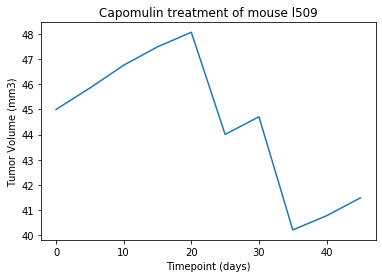

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


TypeError: unhashable type: 'DataFrame'

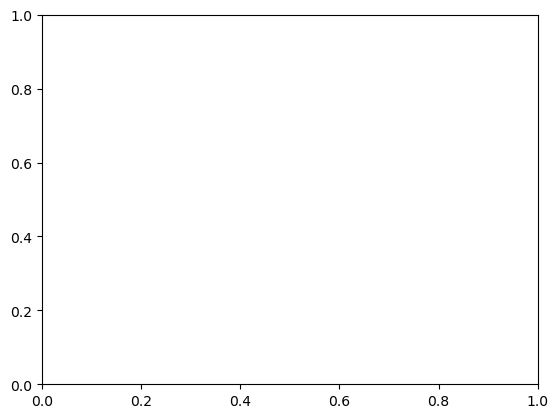

In [17]:
plt.plot(greatest_timepoint_df['Timepoint'], tumor_volume_data)
plt.xlabel = 'Timepoint(days)'
plt.ylabel = 'Tumor Volume (mm3)'
plt.title = 'Capomulin treatment of mouse i509'

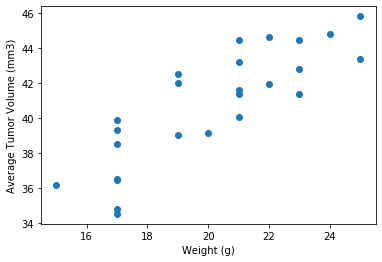

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


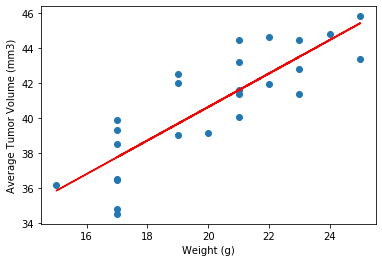

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

